In [1]:
# import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import the API key.
from config import weather_api_key

#Import the datetime module from the dattetime library.
from datetime import datetime

# import the request libary
import requests

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
#Create an empty list to thold the weather date
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

#create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
#for i in range(len(cities)):

#loop through all the cities in the list using enumerate method
for i, city in enumerate(cities):
    
    #group cities in sets fo 50 for logging purposes
    if(i%50==0 and i >= 50):
        set_count += 1
        record_count = 1
        
    #create endpoint url with each city.
    city_url = url + "&q=" + city
    print(city_url)
    #Log the url, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count +=1
    
#     city_weather = requests.get(city_url)
#     city_weather
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval      
------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=maxixe
Processing Record 1 of Set 1 | maxixe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=hof
Processing Record 2 of Set 1 | hof
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=baykit
Processing Record 3 of Set 1 | baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=kapaa
Processing Record 4 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=hobyo
Processing Record 5 of Set 1 | hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=broome
Processing Record 6 of Set 1 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperia

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=hilo
Processing Record 5 of Set 2 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=cape town
Processing Record 6 of Set 2 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=samusu
Processing Record 7 of Set 2 | samusu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=bluff
Processing Record 8 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=bubaque
Processing Record 9 of Set 2 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=esperance
Processing Record 10 of Set 2 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d670658

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=anadyr
Processing Record 10 of Set 3 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=new norfolk
Processing Record 11 of Set 3 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=souillac
Processing Record 12 of Set 3 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=hermanus
Processing Record 13 of Set 3 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=sechura
Processing Record 14 of Set 3 | sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=katsuura
Processing Record 15 of Set 3 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d6706585048225

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=waipawa
Processing Record 13 of Set 4 | waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=sitka
Processing Record 14 of Set 4 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=upernavik
Processing Record 15 of Set 4 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=tabialan
Processing Record 16 of Set 4 | tabialan
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=nantucket
Processing Record 17 of Set 4 | nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=bambous virieux
Processing Record 18 of Set 4 | bambous virieux
http://api.openweathermap.org/data/2.5/weath

Processing Record 15 of Set 5 | orbetello
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=fenoarivo
Processing Record 16 of Set 5 | fenoarivo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=warmbad
Processing Record 17 of Set 5 | warmbad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=armacao dos buzios
Processing Record 18 of Set 5 | armacao dos buzios
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=mosjoen
Processing Record 19 of Set 5 | mosjoen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=kapit
Processing Record 20 of Set 5 | kapit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=alofi
Processing Record 21 of Set 5 | alofi
http:/

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=yining
Processing Record 19 of Set 6 | yining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=akyab
Processing Record 20 of Set 6 | akyab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=saint-joseph
Processing Record 21 of Set 6 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=constantine
Processing Record 22 of Set 6 | constantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=geraldton
Processing Record 23 of Set 6 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=saldanha
Processing Record 24 of Set 6 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d6706585

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=southbridge
Processing Record 22 of Set 7 | southbridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=gravdal
Processing Record 23 of Set 7 | gravdal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=tefe
Processing Record 24 of Set 7 | tefe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=riacho de santana
Processing Record 25 of Set 7 | riacho de santana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=bengkulu
Processing Record 26 of Set 7 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=narsaq
Processing Record 27 of Set 7 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d670

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=hay river
Processing Record 26 of Set 8 | hay river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=tevaitoa
Processing Record 27 of Set 8 | tevaitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=amapa
Processing Record 28 of Set 8 | amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=san quintin
Processing Record 29 of Set 8 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=nazca
Processing Record 30 of Set 8 | nazca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=loubomo
Processing Record 31 of Set 8 | loubomo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=nyimba
Processing Record 28 of Set 9 | nyimba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=tabory
Processing Record 29 of Set 9 | tabory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=nuevo imperial
Processing Record 30 of Set 9 | nuevo imperial
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=sao miguel do araguaia
Processing Record 31 of Set 9 | sao miguel do araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=lewistown
Processing Record 32 of Set 9 | lewistown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=lower burrell
Processing Record 33 of Set 9 | lower burrell
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=kamenskoye
Processing Record 30 of Set 10 | kamenskoye
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=tombouctou
Processing Record 31 of Set 10 | tombouctou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=mrirt
Processing Record 32 of Set 10 | mrirt
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=blackfoot
Processing Record 33 of Set 10 | blackfoot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=inuvik
Processing Record 34 of Set 10 | inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=mitsamiouli
Processing Record 35 of Set 10 | mitsamiouli
http://api.ope

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=khasan
Processing Record 32 of Set 11 | khasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=uusikaupunki
Processing Record 33 of Set 11 | uusikaupunki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=ulaangom
Processing Record 34 of Set 11 | ulaangom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=mahajanga
Processing Record 35 of Set 11 | mahajanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=mosetse
Processing Record 36 of Set 11 | mosetse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=macusani
Processing Record 37 of Set 11 | macusani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d670

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=ferkessedougou
Processing Record 35 of Set 12 | ferkessedougou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=imbituba
Processing Record 36 of Set 12 | imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=port augusta
Processing Record 37 of Set 12 | port augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=kibala
Processing Record 38 of Set 12 | kibala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=ouargaye
Processing Record 39 of Set 12 | ouargaye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=amaigbo
Processing Record 40 of Set 12 | amaigbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

In [8]:
len(city_data)

565

In [10]:
#convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maxixe,-23.86,35.35,78.39,80,100,29.24,MZ,2020-02-23 20:52:28
1,Hof,50.32,11.92,51.80,93,90,21.92,DE,2020-02-23 20:52:29
2,Baykit,61.67,96.37,8.71,95,73,2.55,RU,2020-02-23 20:52:30
3,Kapaa,22.08,-159.32,77.00,61,1,4.21,US,2020-02-23 20:51:55
4,Hobyo,5.35,48.53,77.47,73,91,17.43,SO,2020-02-23 20:52:30
5,Broome,42.25,-75.83,52.00,26,1,9.17,US,2020-02-23 20:52:31
6,Nikolskoye,59.70,30.79,37.40,86,90,6.71,RU,2020-02-23 20:51:56
7,Husavik,66.04,-17.34,19.56,83,2,10.60,IS,2020-02-23 20:52:31
8,Goderich,43.75,-81.72,46.00,61,17,5.01,CA,2020-02-23 20:52:32
9,Mataura,-46.19,168.86,57.99,85,77,5.99,NZ,2020-02-23 20:51:56


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_datanew_df = city_data_df[new_column_order]
city_datanew_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maxixe,MZ,2020-02-23 20:52:28,-23.86,35.35,78.39,80,100,29.24
1,Hof,DE,2020-02-23 20:52:29,50.32,11.92,51.80,93,90,21.92
2,Baykit,RU,2020-02-23 20:52:30,61.67,96.37,8.71,95,73,2.55
3,Kapaa,US,2020-02-23 20:51:55,22.08,-159.32,77.00,61,1,4.21
4,Hobyo,SO,2020-02-23 20:52:30,5.35,48.53,77.47,73,91,17.43
5,Broome,US,2020-02-23 20:52:31,42.25,-75.83,52.00,26,1,9.17
6,Nikolskoye,RU,2020-02-23 20:51:56,59.70,30.79,37.40,86,90,6.71
7,Husavik,IS,2020-02-23 20:52:31,66.04,-17.34,19.56,83,2,10.60
8,Goderich,CA,2020-02-23 20:52:32,43.75,-81.72,46.00,61,17,5.01
9,Mataura,NZ,2020-02-23 20:51:56,-46.19,168.86,57.99,85,77,5.99


In [14]:
#create the output file(csv)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_datanew_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_datanew_df["Lat"]
max_temps = city_datanew_df["Max Temp"]
humidity = city_datanew_df["Humidity"]
cloudiness = city_datanew_df["Cloudiness"]
wind_speed = city_datanew_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/23/20'

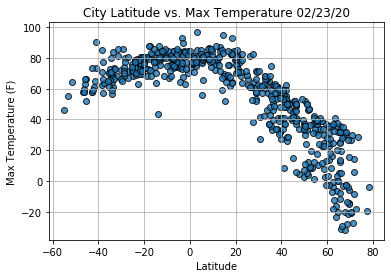

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

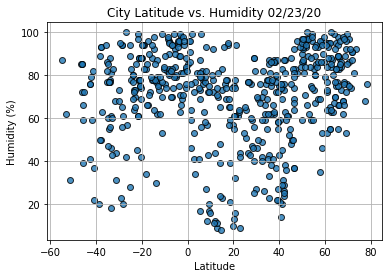

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

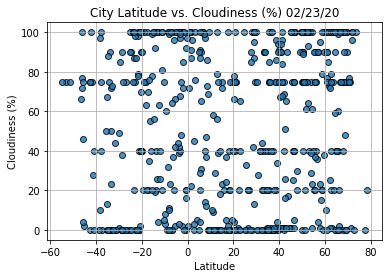

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()